In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geniusLyrics = pd.read_csv('lyricGenius.csv')
spotifyFeatures = pd.read_csv('filtered_tracks_with_features.csv',encoding = "ISO-8859-1")

In [12]:
geniusLyrics.head()

,Unnamed: 0,index,Track Name,Artist,lyricsGenius
0,0,771622,Bad and Boujee (feat. Lil Uzi Vert),Migos,"\n\n[Intro: Offset]\nYou know, young rich nigg..."
1,1,771623,Fake Love,Drake,"\n\n[Chorus]\nI've been down so long, it look ..."
2,2,771624,Starboy,The Weeknd,\n\n[Verse 1]\nI'm tryna put you in the worst ...
3,3,771625,Closer,The Chainsmokers,"\n\n[Verse 1: Andrew Taggart]\nHey, I was doin..."
4,4,771626,Black Beatles,Rae Sremmurd,\n\n[Intro: Swae Lee & Gucci Mane]\nBlack Beat...


In [ ]:
spotifyFeatures

In [43]:
song = pd.read_csv('data.csv')

In [44]:
top10Countries = song.groupby('Region')['Streams'].mean().reset_index().sort_values('Streams',ascending=False).reset_index()['Region'][1:10]

In [9]:
top10Countries

1    us
2    gb
3    br
4    mx
5    de
6    es
7    nl
8    au
9    se
Name: Region, dtype: object

In [45]:
song_top10 = pd.DataFrame([x for i,x in song.iterrows() if x['Region'] in np.array(top10Countries)])

In [46]:
song_top10

,Position,Track Name,Artist,Streams,URL,Date,Region
771622,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017-01-01,us
771623,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-01,us
771624,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,us
771625,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,us
771626,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-01,us
771627,6,Broccoli (feat. Lil Yachty),DRAM,763259,https://open.spotify.com/track/7yyRTcZmCiyzzJl...,2017-01-01,us
771628,7,One Dance,Drake,753150,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,us
771629,8,Caroline,Aminé,714839,https://open.spotify.com/track/7FB8l7UA1HKqnuS...,2017-01-01,us
771630,9,Let Me Love You,DJ Snake,690483,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,us
771631,10,Bounce Back,Big Sean,682688,https://open.spotify.com/track/0SGkqnVQo9KPytS...,2017-01-01,us


In [3]:
## clean genius lyrics
geniusLyricsFil = geniusLyrics[geniusLyrics['lyricsGenius'] != 'Err']

In [54]:
spotifyFeatures = spotifyFeatures.drop_duplicates(['Track Name','Artist'])

(7803, 18)

In [61]:
songMetadata = geniusLyricsFil.merge(spotifyFeatures,how='left',on=['Track Name','Artist']).drop(['lyricsGenius',
                                                                                  'Unnamed: 0_x',
                                                                                  'Unnamed: 0_y','URL','id','index'],axis=1)

In [62]:
songMetadata

,Track Name,Artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Bad and Boujee (feat. Lil Uzi Vert),Migos,0.061000,0.927,343150.0,0.665,0.000000,11.0,0.1230,-5.313,1.0,0.2440,127.076,4.0,0.175
1,Fake Love,Drake,0.108000,0.927,210937.0,0.488,0.000000,9.0,0.1960,-9.433,0.0,0.4200,133.987,4.0,0.605
2,Starboy,The Weeknd,0.165000,0.681,230453.0,0.594,0.000003,7.0,0.1340,-7.028,1.0,0.2820,186.054,4.0,0.535
3,Closer,The Chainsmokers,0.414000,0.748,244960.0,0.524,0.000000,8.0,0.1110,-5.599,1.0,0.0338,95.010,4.0,0.661
4,Black Beatles,Rae Sremmurd,0.130000,0.794,291893.0,0.646,0.000000,0.0,0.1400,-6.235,1.0,0.0614,145.931,4.0,0.322
5,Broccoli (feat. Lil Yachty),DRAM,0.236000,0.886,225205.0,0.525,0.000000,8.0,0.0570,-7.390,1.0,0.1310,145.990,4.0,0.708
6,One Dance,Drake,0.007840,0.791,173987.0,0.619,0.004230,1.0,0.3510,-5.886,1.0,0.0532,103.989,4.0,0.371
7,Caroline,Aminé,0.174000,0.952,209640.0,0.318,0.000000,10.0,0.2050,-10.357,1.0,0.4670,120.077,4.0,0.665
8,Let Me Love You,DJ Snake,0.078400,0.476,205947.0,0.718,0.000010,8.0,0.1220,-5.309,1.0,0.0576,199.864,4.0,0.142
9,Bounce Back,Big Sean,0.105000,0.770,222360.0,0.567,0.000000,2.0,0.1250,-5.698,1.0,0.1750,81.477,4.0,0.260


In [76]:
#sum(songMetadata.instrumentalness == 0)
#pd.Series(np.log(songMetadata.instrumentalness + 1e-6)).hist()
key_oh =pd.get_dummies(songMetadata.key)
ohc = key_oh.columns
ohc = ['is_key_%d'%c for c in ohc]
key_oh.columns = ohc
songMetadata = pd.concat([songMetadata,key_oh],1)
songMetadata = songMetadata.drop('key',axis=1)

In [82]:
songMetadata.to_csv('songMetadata.csv')

In [4]:
def filterSongLyric(lyric,wordArr):
    for word in wordArr:
        lyric = lyric.replace(word,'')
    return lyric

In [5]:
wordArr = ['Intro','\n','\\',"\'",'Verse','[',']','Chorus','Intro']

In [6]:
doc_lyr_initial = [filterSongLyric(x,wordArr) for x in geniusLyricsFil['lyricsGenius']]

## LDA TEST

In [9]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [ ]:
import nltk
nltk.download()

In [36]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
stop = stop
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_lyr_initial]

In [ ]:
! pip install gensim

In [37]:
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [42]:
print(ldamodel.print_topics(num_topics=11, num_words=10))

[(0, '0.018*"im" + 0.018*"oh" + 0.010*"back" + 0.009*"like" + 0.008*"know" + 0.007*"love" + 0.006*"let" + 0.005*"way" + 0.005*"go" + 0.005*"get"'), (1, '0.027*"ik" + 0.023*"de" + 0.021*"je" + 0.016*"die" + 0.014*"een" + 0.012*"niet" + 0.010*"het" + 0.009*"op" + 0.008*"que" + 0.008*"al"'), (2, '0.051*"na" + 0.004*"nana" + 0.003*"gang" + 0.003*"bam" + 0.002*"dicka" + 0.002*"ey" + 0.002*"serka" + 0.002*"nah" + 0.002*"1" + 0.002*"holz"'), (3, '0.017*"know" + 0.016*"love" + 0.015*"dont" + 0.009*"im" + 0.008*"like" + 0.008*"youre" + 0.008*"feel" + 0.008*"wanna" + 0.007*"go" + 0.007*"want"'), (4, '0.026*"ich" + 0.020*"die" + 0.015*"und" + 0.013*"du" + 0.012*"der" + 0.011*"ist" + 0.011*"da" + 0.011*"auf" + 0.011*"nicht" + 0.010*"wie"'), (5, '0.018*"like" + 0.016*"got" + 0.014*"im" + 0.011*"get" + 0.010*"dont" + 0.009*"know" + 0.008*"nigga" + 0.008*"aint" + 0.006*"yeah" + 0.005*"make"'), (6, '0.021*"feat" + 0.005*"ft" + 0.005*"le" + 0.004*"la" + 0.003*"de" + 0.003*"pa" + 0.003*"ta" + 0.003*"my"

In [100]:
len(doc_clean)

5540

# DTM PCA

In [90]:
dtm = np.array([np.array(v) for v in doc_term_matrix])

In [91]:
dtm.shape

(5540,)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer(decode_error = 'ignore', stop_words = 'english',min_df = 8)

In [16]:
X = vectorizer.fit_transform(doc_lyr_initial).toarray()

In [17]:
X.shape

(5540, 9030)

In [16]:
np.save('DTM_lyr.npy',X)

In [41]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 1000)

In [42]:
pca_fitmod = pca_model.fit(X)

In [43]:
variance = pca_fitmod.explained_variance_ratio_ #calculate variance ratios                                        
cv=np.cumsum(np.round(pca_model.explained_variance_ratio_,decimals=3)*100)

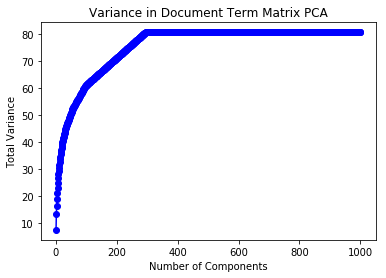

In [47]:
plt.plot(range(1,1001),cv, c='blue', marker='o')
plt.title('Variance in Document Term Matrix PCA')
plt.ylabel('Total Variance')
plt.xlabel('Number of Components')
#plt.show()
plt.savefig('VarianceDTM.png')



In [51]:
pca_model = PCA(n_components = 300)
pca_fitmod = pca_model.fit(X)
pca_x = pca_fitmod.fit_transform(X)

In [60]:
pd.concat([geniusLyricsFil,pd.DataFrame(pca_x)],1).drop('lyricsGenius',)


ValueError: labels ['lyricsGenius'] not contained in axis

## KMEANS LDA